<a href="https://colab.research.google.com/github/jouinisihem/Multimodal-Medical-Visual-Question-Answering-VQA-/blob/main/Pr%C3%A9paration%2BExploration_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Présentation du Dataset  Med-VQA-2019  

## Importez les bibliothèques nécessaires et configurez l'environnement :

In [ ]:
!pip install datasets

In [ ]:
#Importation des librairies necessaires
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

import torch
import torchvision.transforms.functional as fn
# load_dataset est utiliser pour instancier l'ensemble de données  
from datasets import load_dataset


# Préparation des données


Chargement des données


In [ ]:
#Monter Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Nous utiliserons  pandas pour lire le jeu de données et le charger dans un dataframe.
t = pd.read_csv ("/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/VQAMed2019Training/All_QA_Pairs_train.txt", sep='|' )
v = pd.read_csv ("/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/VQAMed2019Validation/All_QA_Pairs_val.txt", sep='|' )
e = pd.read_csv ("/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/VQAMed2019Test/VQAMed2019_Test_Questions_w_Ref_Answers.txt", sep='|' )
e.columns = ["img_id","category" ,"question", "answer"]

t.columns = ["img_id", "question", "answer"]
v.columns = ["img_id", "question", "answer"]
e.drop(columns=['category'], inplace=True)


In [ ]:
train = pd.concat([t,v,e])
#Afficher les premieres lignes
train.head()

,img_id,question,answer
0,synpic43984,is this a t1 weighted image?,no
1,synpic38930,what type of imaging modality is used to acqui...,us - ultrasound
2,synpic52143,is this a noncontrast mri?,no
3,synpic20934,what type of image modality is this?,xr - plain film
4,synpic19141,with what modality is this image taken?,xr - plain film


In [ ]:
e.shape

(499, 3)

Nous avons environ 15289 paire question-réponse. 

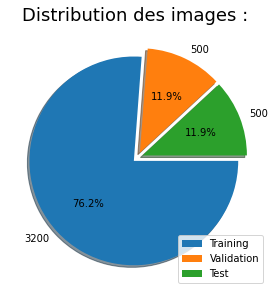

In [ ]:
import matplotlib.pyplot as plt
 
values = [3200,500,500]
labels = ['Training', 'Validation', 'Test']
explode = (0.05, 0.05, 0.05)
plt.pie(values, labels= values,explode=explode,counterclock=False, shadow=True, autopct='%1.1f%%')
font1 = {'color':'black','size':18}

plt.title('Distribution des images : ', fontdict = font1)
plt.legend(labels,loc="lower right"
)
plt.show()



In [ ]:
#Afficher le type des données  
train.dtypes

img_id      object
question    object
answer      object
dtype: object

In [ ]:
#Afficher le nombre des questions uniques
print('Nombre des questions uniques :', train['question'].nunique())

Nombre des questions uniques : 253


In [ ]:
#Afficher le nombre des réponses uniques
print('Nombre des reponses uniques :', train['answer'].nunique())

Nombre des reponses uniques : 1749


In [ ]:
#Evaluer les données manquantes
train.isnull()

,img_id,question,answer
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
494,False,False,False
495,False,False,False
496,False,False,False
497,False,False,False


In [ ]:
#cree un espace de toutes les réponses possibles
answer_space = []
for ans in train.answer.to_list():
    answer_space = answer_space + [ans] #if "," not in ans else answer_space + ans.split(",") 
    
answer_space = list(set(answer_space))
answer_space.sort()
with open(os.path.join('/content/drive/MyDrive/Sihem Jouini /VQA-Med2019 (1)/answer_space.txt'), "w") as f:
    f.writelines("\n".join(answer_space)) 

#### Enregistrement des données

In [ ]:
t.to_csv('/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/data_train.csv',index=None)
v.to_csv('/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/data_val.csv',index=None)
e.to_csv('/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/data_test.csv',index=None)

# EDA

C**harger le jeu de données VQA-Med2019 traité :**

Nous sommes maintenant prêts à charger ces données à l'aide de cet ensemble de données traité. Étant donné que nous modélisons cette tâche comme une tâche de classification multiclasse, nous devons attribuer des étiquettes à chaque réponse. Ces étiquettes sont dérivées des indices des réponses dans l'espace des réponses.

In [ ]:
# Charger et instancier l'ensemble de données d'entraînement et d'évaluation présent au format CSV
dataset = load_dataset(
    "csv", 
    data_files={
        "training": os.path.join('/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/data_train.csv'),
        "validation": os.path.join('/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/data_val.csv'),
        "test": os.path.join('/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/data_test.csv')

    }
)

# Charger l'espace de toutes les réponses possibles
with open(os.path.join('/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/answer_space.txt')) as f:
    answer_space = f.read().splitlines()

# Puisque nous modélisons la tâche VQA comme un problème de classification multiclasse,
# nous devons créer les étiquettes à partir des réponses réelles
#chaque label va prendre l'indexe de réponse
dataset = dataset.map(
    lambda examples: {
        'label': [
            answer_space.index(ans) for ans in examples['answer']           
        ]
    },
    batched=True
)
dataset

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-1615eaae33243c65/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    training: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 12791
    })
    validation: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 1999
    })
    test: Dataset({
        features: ['img_id', 'question', 'answer', 'label'],
        num_rows: 499
    })
})

##1 Image

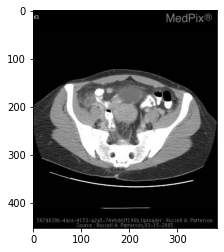

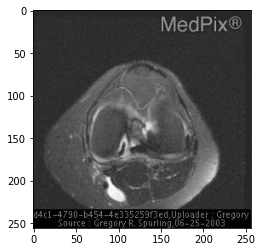

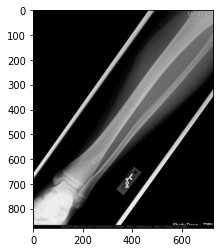

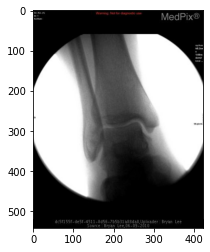

In [ ]:
def process(training=True, id=None):
  if training:
    data = dataset["training"]
  else:
    data = dataset["validation"]
  if id == None:
    id = np.random.randint(len(data))
  root_dir = '/content/drive/MyDrive/Sihem Jouini /VQA-Med2019 (1)/images'
  image = Image.open(os.path.join( root_dir, data[id]["img_id"] + ".jpg"))
  plt.figure()
  plt.imshow(image)
for id in range(0,4):
  process()


We can see that the shape of the images are different



## 2 Question

In [ ]:
import random
ques=train['question'].values
idx = random.sample(range(0, len(ques)), 20)
for i in (idx):
  print(ques[i])
  print('_'*50)

in what plane is this image taken?
__________________________________________________
what organ systems can be evaluated with this mri?
__________________________________________________
what imaging modality was used to take this image?
__________________________________________________
which organ system is imaged?
__________________________________________________
what organ system is imaged?
__________________________________________________
what is the primary abnormality in this image?
__________________________________________________
what organ system is displayed in this mri?
__________________________________________________
is this a contrast or noncontrast mri?
__________________________________________________
what plane is this?
__________________________________________________
what organ system is displayed in this angiogram?
__________________________________________________
is this a t1 weighted, t2 weighted, or flair image?
__________________________________________

**Examinons le nombre de mots pour chaque question :**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


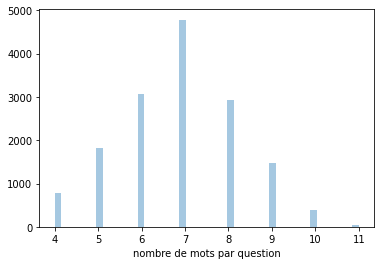

In [ ]:
train['nombre de mots par question'] = [len(q.split()) for q in train['question']]
sns.distplot(train['nombre de mots par question'], kde=False, rug=False)

Nous pouvons voir sur le graphique ci-dessus que la plupart des questions possèdent 7 mots , un minimum 4 mots et 11 maximum .

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


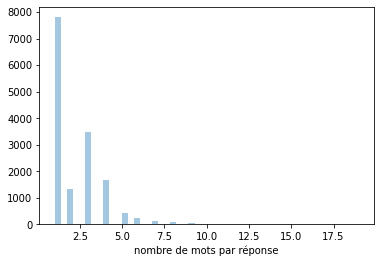

In [ ]:
train['nombre de mots par réponse'] = [len(a.split()) for a in train['answer']]
sns.distplot(train['nombre de mots par réponse'], kde=False, rug=False)

**Regardez quelques-unes des combinaisons Question/Image/Réponse :**

Nous pouvons  inspecter les entrées présentes dans notre ensemble de données d'entraînement ou d'évaluation (spécifiques ou aléatoires) 

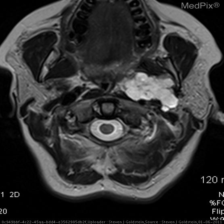

Question: 	what abnormality is seen in the image?
Réponse: 	pleomorphic adenoma of the parotid gland


In [ ]:
#exemple aléatoire

def showExample(mode, id=None):
  if mode=="training":
    data = dataset["training"]
  elif mode=="validation":
    data = dataset["validation"]
  else:
    data = dataset["test"] 
  if id == None:
    id = np.random.randint(len(data))
  root_dir = '/content/drive/MyDrive/Sihem Jouini /VQA-Med2019/images'
  image = Image.open(os.path.join( root_dir, data[id]["img_id"] + ".jpg"))
  crop = fn.center_crop(image, output_size=[224])
  new_img = fn.resize(image, size=[224,224])
  display(new_img) 
  print('Question: \t' + data[id]['question'])
  print('Réponse: \t' + data[id]['answer'] )

showExample(mode="training")

  #print("Answer:\t" + data[id]["answer"] + "(Label: {0})".format(data[id]["label"]))
